<a href="https://colab.research.google.com/github/MaiaCaroline/MaiaCaroline/blob/main/pca_exemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplos PCA

## Modulos

In [ ]:
# gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# pca
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

## Dados

In [ ]:
dados = pd.read_csv('dados_municipios.csv')

In [ ]:
dados.head()

,ano,estado,municipio,t_agua,t_banagua,t_lixo,t_luz,T_ANALF18M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_ATRASO_2_MED
0,2010,Rondônia,ALTA FLORESTA D'OESTE,93.69,80.20,94.05,93.98,13.00,22.03,17.82,7.79
1,2010,Rondônia,ARIQUEMES,98.54,85.35,96.72,98.58,8.53,19.35,16.74,3.96
2,2010,Rondônia,CABIXI,95.49,91.63,99.14,96.36,14.73,15.59,12.93,6.93
3,2010,Rondônia,CACOAL,97.96,93.44,98.17,98.89,8.94,15.57,12.58,7.33
4,2010,Rondônia,CEREJEIRAS,97.53,86.87,91.89,98.85,11.17,12.93,10.27,3.82


## Etapa 1 - Avaliar correlações

In [ ]:
# obter correlacoes
colunas_correl = ['t_agua', 't_banagua', 't_lixo', 't_luz',
                  'T_ANALF18M', 'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_ATRASO_2_MED']
correlacao = dados[colunas_correl].corr()

In [ ]:
# grafico correlacao
correlacao.style.background_gradient(cmap='coolwarm').set_precision(2)

,t_agua,t_banagua,t_lixo,t_luz,T_ANALF18M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_ATRASO_2_MED
t_agua,1.00,0.72,0.28,0.41,-0.63,-0.54,-0.50,-0.32
t_banagua,0.72,1.00,0.59,0.58,-0.75,-0.69,-0.64,-0.48
t_lixo,0.28,0.59,1.00,0.33,-0.41,-0.39,-0.36,-0.31
t_luz,0.41,0.58,0.33,1.00,-0.36,-0.48,-0.48,-0.31
T_ANALF18M,-0.63,-0.75,-0.41,-0.36,1.00,0.68,0.62,0.45
T_ATRASO_2_BASICO,-0.54,-0.69,-0.39,-0.48,0.68,1.00,0.97,0.61
T_ATRASO_2_FUND,-0.50,-0.64,-0.36,-0.48,0.62,0.97,1.00,0.52
T_ATRASO_2_MED,-0.32,-0.48,-0.31,-0.31,0.45,0.61,0.52,1.00


Todas as correlações entre moderadas a altas

## Etapa 2 - Definir número de componentes

In [ ]:
# separar os dados
cols_pca = ['t_agua', 't_banagua', 't_lixo', 't_luz', 'T_ANALF18M',
            'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_ATRASO_2_MED']

dados_pca = dados[cols_pca]

In [ ]:
dados_pca.head()

,t_agua,t_banagua,t_lixo,t_luz,T_ANALF18M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_ATRASO_2_MED
0,93.69,80.20,94.05,93.98,13.00,22.03,17.82,7.79
1,98.54,85.35,96.72,98.58,8.53,19.35,16.74,3.96
2,95.49,91.63,99.14,96.36,14.73,15.59,12.93,6.93
3,97.96,93.44,98.17,98.89,8.94,15.57,12.58,7.33
4,97.53,86.87,91.89,98.85,11.17,12.93,10.27,3.82


In [ ]:
# normalizar
dados_pca_normalizados = scale(dados_pca)
dados_pca_normalizados.shape

(5565, 8)

In [ ]:
dados_pca_normalizados

array([[ 5.49726131e-01, -3.09368550e-02,  2.42172576e-04, ...,
         1.05313573e-01,  7.98869347e-02,  4.30400641e-02],
       [ 8.79209721e-01,  2.06275414e-01,  2.41903242e-01, ...,
        -1.81750931e-01, -5.38453800e-02, -6.33085596e-01],
       [ 6.72008701e-01,  4.95536201e-01,  4.60936871e-01, ...,
        -5.84498146e-01, -5.25623268e-01, -1.08779275e-01],
       ...,
       [-2.36432500e-02,  5.78445343e-01,  4.67272554e-01, ...,
        -3.95978173e-01, -6.74214729e-01, -4.53020799e-01],
       [-5.20246352e-01,  4.25524036e-01,  5.38775268e-01, ...,
         2.53130370e-01,  5.21946531e-01, -6.54269690e-01],
       [ 8.51356469e-01,  6.97281781e-01,  4.36499234e-01, ...,
        -5.09518611e-01, -4.17894459e-01,  1.47946057e-02]])

- Ajustamos o PCA com todas as colunas

In [ ]:
# instanciar o pca
numero_componentes = 8
pca = PCA(n_components=numero_componentes)

In [ ]:
# aplicar o algoritmo nos dados
transformacao_pca = pca.fit_transform(dados_pca_normalizados)

### Critério do autovalor

In [ ]:
autovalores = pca.explained_variance_
autovalores

array([4.70363134, 0.85335169, 0.75949012, 0.69020576, 0.51875462,
       0.30646742, 0.14775458, 0.02178229])

Somente o primeiro autovalor acima de 1

 ### Critério *Screeplot*

In [ ]:
n_componentes = np.arange(pca.n_components_) + 1

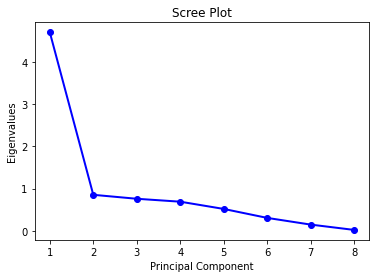

In [ ]:
plt.plot(n_componentes, autovalores, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.show()

A partir do segundo componente o gráfico fica praticamente estático

### Variância Explicada

In [ ]:
pca.explained_variance_ratio_

array([0.58784827, 0.10664979, 0.0949192 , 0.08626022, 0.06483268,
       0.03830154, 0.018466  , 0.0027223 ])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.58784827, 0.69449806, 0.78941726, 0.87567748, 0.94051016,
       0.9788117 , 0.9972777 , 1.        ])

- O primeiro componente explica 58,78% da variação dos dados.
- Somando os dois primeiros componentes teremos 69,44% da variação dos dados.
- Uma solução contendo dois componentes parece ser a melhor escolha

## Etapa 3 - Interpretação (Opcional)

- Vamos aplicar o PCA com 2 componentes

In [ ]:
# instanciar o pca
numero_componentes = 2
pca = PCA(n_components=numero_componentes)

In [ ]:
# retreinar
pca_retreinado = pca.fit_transform(dados_pca_normalizados)

- Obter as cargas fatoriais

In [ ]:
cargas = pca.components_.T * np.sqrt(pca.explained_variance_)

In [ ]:
componentes_cols = ['PC'+str(i) for i in range(1, numero_componentes+1)]

In [ ]:
df_cargas = pd.DataFrame(cargas, columns=componentes_cols, index=cols_pca)

In [ ]:
# cargas grafico
df_cargas.style.background_gradient(cmap='coolwarm').set_precision(2)

,PC1,PC2
t_agua,-0.73,-0.20
t_banagua,-0.90,-0.28
t_lixo,-0.58,-0.52
t_luz,-0.63,-0.22
T_ANALF18M,0.82,0.05
T_ATRASO_2_BASICO,0.90,-0.34
T_ATRASO_2_FUND,0.86,-0.34
T_ATRASO_2_MED,0.65,-0.42


Por meio da análise do primeiro componente (PC1), pode-se observar que as variáveis T_ANALF18M, T_ATRASO_2_BASICO, T_ATRASO_2_FUND e T_ATRASO_2_MED possuem correlação positiva e os demais correlação negativa.

O problema ocorre na interpretação do segundo componente. Neste caso, vamos utilizar outra função para facilitar a leitura dos dados

- Função para análise fatorial

In [ ]:
# instanciar a fa
numero_componentes = 2
fa = FactorAnalysis(n_components=numero_componentes,
                    rotation = 'varimax',
                    svd_method = 'lapack')

In [ ]:
# aplicar
transformacao_fa = fa.fit_transform(dados_pca_normalizados)

- Obter as cargas fatoriais

In [ ]:
# cargas
cargas = fa.components_.T

In [ ]:
componentes_cols = ['PC'+str(i) for i in range(1, numero_componentes+1)]

In [ ]:
df_cargas = pd.DataFrame(cargas, columns=componentes_cols, index=cols_pca)

In [ ]:
# cargas grafico
df_cargas.style.background_gradient(cmap='coolwarm').set_precision(2)

,PC1,PC2
t_agua,-0.35,0.63
t_banagua,-0.42,0.91
t_lixo,-0.22,0.55
t_luz,-0.34,0.48
T_ANALF18M,0.52,-0.59
T_ATRASO_2_BASICO,0.94,-0.33
T_ATRASO_2_FUND,0.93,-0.28
T_ATRASO_2_MED,0.55,-0.27


Após o ajuste da função FactorAnalysis, conseguimos observar claramente as diferenças. No PC1 temos algo como "Atraso na Educação" e PC2 como "Qualidade de Estilo de vida"

## Obter os novos indicadores

In [ ]:
dados[['PC1', 'PC2']] = transformacao_fa

#dados[['PC1', 'PC2']] = pca_retreinado

In [ ]:
dados.head()

,ano,estado,municipio,t_agua,t_banagua,t_lixo,t_luz,T_ANALF18M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_ATRASO_2_MED,PC1,PC2
0,2010,Rondônia,ALTA FLORESTA D'OESTE,93.69,80.20,94.05,93.98,13.00,22.03,17.82,7.79,0.119588,0.024335
1,2010,Rondônia,ARIQUEMES,98.54,85.35,96.72,98.58,8.53,19.35,16.74,3.96,-0.130501,0.175610
2,2010,Rondônia,CABIXI,95.49,91.63,99.14,96.36,14.73,15.59,12.93,6.93,-0.509281,0.311938
3,2010,Rondônia,CACOAL,97.96,93.44,98.17,98.89,8.94,15.57,12.58,7.33,-0.473412,0.423055
4,2010,Rondônia,CEREJEIRAS,97.53,86.87,91.89,98.85,11.17,12.93,10.27,3.82,-0.967843,-0.133792


- Visualização

In [ ]:
analise_estados = dados.groupby('estado') \
                       .agg(PC1_media = pd.NamedAgg('PC1', 'mean'),
                            PC2_media = pd.NamedAgg('PC2', 'mean'))

In [ ]:
analise_estados.head()

,PC1_media,PC2_media
estado,,
Acre,0.248948,-2.189098
Alagoas,0.863742,-0.542136
Amapá,0.062329,-1.590673
Amazonas,0.922468,-1.835255
Bahia,1.245810,-0.084097


In [ ]:
analise_estados.index

Index(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná',
       'Paraíba', 'Pará', 'Pernambuco', 'Piauí', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia', 'Roraima',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins'],
      dtype='object', name='estado')

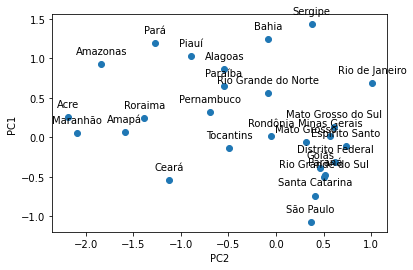

In [ ]:
xs = analise_estados['PC2_media']
ys = analise_estados['PC1_media']
labels = analise_estados.index

# plot the points
plt.scatter(xs,ys)
plt.xlabel('PC2')
plt.ylabel('PC1')

for x,y,label in zip(xs,ys,labels):
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center